# AI and Human Biases within Text Generation
<small>Data set source: https://www.kaggle.com/code/sumedh1507/human-vs-ai-text-classification</small>

In [53]:
import pandas as pd 
filename = "ai_human_content_detection_dataset.csv"
df = pd.read_csv(filename)
df = df.drop(columns= 'text_content')
df.head()

,content_type,word_count,character_count,sentence_count,lexical_diversity,avg_sentence_length,avg_word_length,punctuation_ratio,flesch_reading_ease,gunning_fog_index,grammar_errors,passive_voice_ratio,predictability_score,burstiness,sentiment_score,label
0,academic_paper,288,1927,54,0.9514,5.33,5.69,0.0280,53.08,7.41,1,0.1041,105.86,0.5531,0.2034,1
1,essay,253,1719,45,0.9723,5.62,5.80,0.0262,50.32,8.10,6,0.2045,100.29,0.5643,0.4854,1
2,academic_paper,420,2849,75,0.9071,5.60,5.79,0.0263,46.86,7.86,5,0.2308,96.88,0.4979,-0.2369,1
3,creative_writing,196,1310,34,0.9592,5.76,5.69,0.0260,53.80,7.00,2,0.1912,88.79,0.6241,NaN,1
4,news_article,160,1115,28,0.9688,5.71,5.97,0.0251,44.53,8.29,0,0.1318,26.15,0.2894,NaN,1


In [54]:
df = df.rename(columns={'label': 'Ai(1)-Human(0)'})
df['Ai(1)-Human(0)'].value_counts()

Ai(1)-Human(0)
0    684
1    683
Name: count, dtype: int64

In [55]:
df = df.dropna()
df.shape

(1179, 16)

## Lexical Diversity Comparison: AI vs Human Generated Text

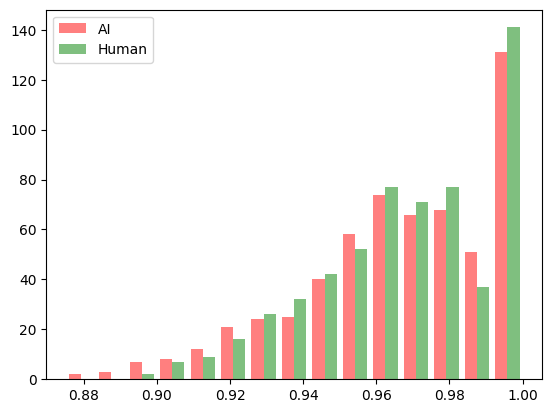

In [56]:
import matplotlib.pyplot as plt
ai = df[df['Ai(1)-Human(0)'] == 1]['lexical_diversity']
human = df[df['Ai(1)-Human(0)'] == 0]['lexical_diversity']
plt.hist([ai, human], bins=15, alpha=0.5, label=['AI', 'Human'], color=['red', 'green'])
plt.legend()
plt.show()

### Conclusion
- The lower range of lexical diversity does incur slight bias towards AI
- The bin inbetween 0.98 and 1.00 appears to be an anomly, likely due to the small size of the data set
- Overall, Nothing of note as the data displays no significant bias for Humans or AI with respect to differing Lexicality


## Avg Sentence and Word Length Comparison : AI vs Human Generated Text

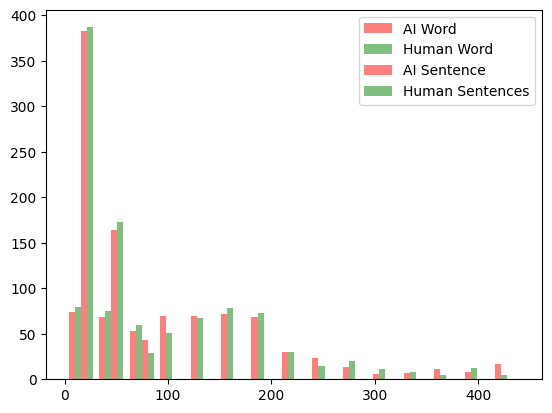

In [57]:
import matplotlib.pyplot as plt
ai_wrd = df[df['Ai(1)-Human(0)'] == 1]['word_count']
human_wrd = df[df['Ai(1)-Human(0)'] == 0]['word_count']
ai_sent = df[df['Ai(1)-Human(0)'] == 1]['sentence_count']
human_sent = df[df['Ai(1)-Human(0)'] == 0]['sentence_count']
plt.hist([ai_wrd, human_wrd, ai_sent, human_sent], bins=15, alpha=0.5, label=['AI Word', 'Human Word', 'AI Sentence','Human Sentences'], color=['red', 'green', 'red', 'green'])
plt.legend()
plt.show()